<a href="https://colab.research.google.com/github/AndrewSmith44/MAT421/blob/main/Module_B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Lagrange Polynomial Interpolation

1.1 Understanding Lagrange Interpolation

Lagrange interpolation is a method of constructing a polynomial that passes through a given set of points
(
𝑥
0
,
𝑦
0
)
,
(
𝑥
1
,
𝑦
1
)
,
…
,
(
𝑥
𝑛
,
𝑦
𝑛
)

  The polynomial is given by:
$$ P(x) = \sum_{i=0}^{n} y_i L_i(x) $$

where
𝐿
𝑖
(
𝑥
)
L
i
​
 (x) are Lagrange basis polynomials:

$$ L_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j} $$


1.2 Implementing Lagrange Interpolation in Python

We will implement Lagrange interpolation in Python using NumPy and Matplotlib.

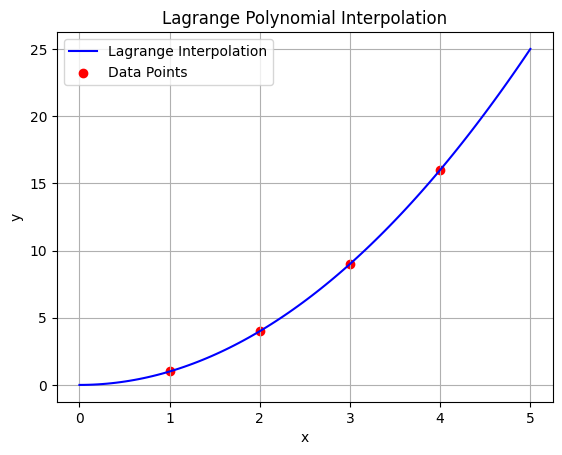

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x_points = np.array([1, 2, 3, 4])
y_points = np.array([1, 4, 9, 16])

def lagrange_interpolation(x, x_points, y_points):
    n = len(x_points)
    result = 0
    for i in range(n):
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += y_points[i] * L_i
    return result


x_vals = np.linspace(0, 5, 100)
y_vals = [lagrange_interpolation(x, x_points, y_points) for x in x_vals]


plt.plot(x_vals, y_vals, label="Lagrange Interpolation", color="blue")
plt.scatter(x_points, y_points, color="red", label="Data Points")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Lagrange Polynomial Interpolation")
plt.grid()
plt.show()


2. Newton’s Polynomial Interpolation

Newton’s interpolation method constructs a polynomial using divided differences, making it more efficient for adding new data points compared to Lagrange interpolation.

2.1 Divided Difference Formula

The Newton interpolating polynomial is given by:
$$ P(x) = f(x_0) + f[x_0, x_1](x - x_0) + f[x_0, x_1, x_2](x - x_0)(x - x_1) + \dots $$

where
𝑓
[
𝑥
𝑖
,
𝑥
𝑖
+
1
,
...,
𝑥
𝑗
]
f[x
i
​
 ,
x
i+1
​
 ,...,x
j
​
 ] are the divided differences, computed using:

 $$ f[x_i, x_{i+1}] = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} $$


For higher orders:

$$ f[x_i, x_{i+1}, x_{i+2}] = \frac{f[x_{i+1}, x_{i+2}] - f[x_i, x_{i+1}]}{x_{i+2} - x_i} $$

2.2 Implementation in Python

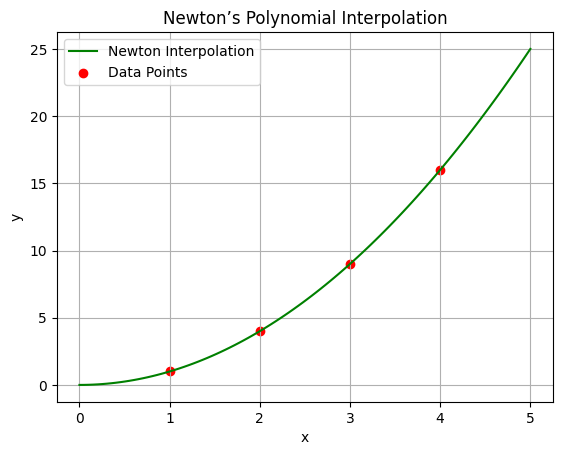

In [2]:
def divided_diff_table(x_points, y_points):
    n = len(y_points)
    coef = np.zeros([n, n])
    coef[:, 0] = y_points

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x_points[i + j] - x_points[i])

    return coef[0, :]

def newton_interpolation(x, x_points, coef):
    n = len(x_points)
    result = coef[0]
    product_term = 1.0

    for i in range(1, n):
        product_term *= (x - x_points[i - 1])
        result += coef[i] * product_term

    return result

coefficients = divided_diff_table(x_points, y_points)

y_newton_vals = [newton_interpolation(x, x_points, coefficients) for x in x_vals]

plt.plot(x_vals, y_newton_vals, label="Newton Interpolation", color="green")
plt.scatter(x_points, y_points, color="red", label="Data Points")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Newton’s Polynomial Interpolation")
plt.grid()
plt.show()


3. Comparison and Conclusion

Lagrange interpolation provides a direct polynomial fit but requires recomputation when new points are added.

Newton’s interpolation is more efficient for sequential data updates due to its divided difference approach.

Both methods approximate the function well, but Newton’s method is computationally advantageous for large datasets.